In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import pca, align
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import sys, math
from timeit import default_timer as timer 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.font_manager import FontProperties

from matplotlib import rc
%matplotlib inline

#upload the trajectory .dcd and the .prmtop file of your simulation 
top='/home/rutika/nucleosome/production/wildtype/1kx5_015M_OPC.prmtop'
traj='/home/rutika/nucleosome/production/wildtype/1kx5_wild_015_unwrap_1us.dcd'
u = mda.Universe(top,traj)

/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)
/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [2]:
#select the residues of interest for PCA calculation 
pc = pca.PCA(u, select='resid 660-692 and backbone',
             align=True, mean=None,
             n_components=None).run()

In [3]:
#select the residues of interest for PCA calculation 
backbone = u.select_atoms('resid 660-692 and backbone')
transformed = pc.transform(backbone, n_components=2)
transformed.shape

(5000, 2)

In [4]:
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(2)])
df['Time (ps)'] = df.index * u.trajectory.dt
df.head()

,PC1,PC2,Time (ps)
0,30.716168,-20.017397,0.000000
1,33.325677,-14.668833,0.000049
2,34.319722,-9.835231,0.000098
3,37.587614,-10.203124,0.000147
4,38.105457,-10.190418,0.000196


In [5]:
#creating .csv file 
df_list = np.array(df)
a1 = pd.DataFrame(df_list)
a1.to_csv("WT_0.15M_H2B1_PC.csv")

In [6]:
A1=pd.read_csv('WT_0.15M_H2B1_PC.csv')
A1

,Unnamed: 0,0,1,2
0,0,30.716168,-20.017397,0.000000
1,1,33.325677,-14.668833,0.000049
2,2,34.319722,-9.835231,0.000098
3,3,37.587614,-10.203124,0.000147
4,4,38.105457,-10.190418,0.000196
...,...,...,...,...
4995,4995,28.767082,-11.427509,0.244197
4996,4996,20.168974,-5.856976,0.244246
4997,4997,19.754552,-6.176542,0.244294
4998,4998,27.886725,-8.608404,0.244343


In [7]:
data = pd.read_csv("WT_0.15M_H2B1_PC.csv",names=['frame','pc1','pc2','ps'],header=0) #to give names to the .csv columns
data

,frame,pc1,pc2,ps
0,0,30.716168,-20.017397,0.000000
1,1,33.325677,-14.668833,0.000049
2,2,34.319722,-9.835231,0.000098
3,3,37.587614,-10.203124,0.000147
4,4,38.105457,-10.190418,0.000196
...,...,...,...,...
4995,4995,28.767082,-11.427509,0.244197
4996,4996,20.168974,-5.856976,0.244246
4997,4997,19.754552,-6.176542,0.244294
4998,4998,27.886725,-8.608404,0.244343


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.font_manager import FontProperties
from matplotlib import rc
from scipy.ndimage.filters import gaussian_filter

#some instances the bins and the range needs to be adjusted 
def cal_2d(x,y,temp,R,pmf_max):
    H, xedges, yedges = np.histogram2d(x,y,density=True,bins=(30,30),range=([-60,60],[-30,30]))
    stepx = xedges[1]-xedges[0]
    stepy = yedges[1]-yedges[0]
    xx, yy = np.mgrid[xedges.min():xedges.max():stepx,yedges.min():yedges.max():stepy]
    pos = np.dstack((xx, yy))
    pmax = 0
    for i in H:
        p = i.sum()
        if p >=pmax:
            pmax = p
    print("Found pmax = ",pmax)
    # print(" xedges, yedges, H = ",(H, xedges, yedges))

    for i in range(len(H)):
        for j in range(len(H.T)):
            if H[i,j]!=0:
                H[i,j]=-R*temp*np.log(H[i,j]/pmax)
            else:
                H[i,j]=pmf_max
    # print(pos,H)
    return pos,H


In [24]:
#calculating pmax 
data = pd.read_csv("WT_0.15M_H2B1_PC.csv",names=['frame','pc1','pc2','ps'],header=0)
pos,H=cal_2d(data['pc1'],data['pc2'],310,0.001987,6.0)

Found pmax =  0.011046362704918034


In [25]:
pos,H

(array([[[-60., -30.],
         [-60., -28.],
         [-60., -26.],
         ...,
         [-60.,  24.],
         [-60.,  26.],
         [-60.,  28.]],
 
        [[-56., -30.],
         [-56., -28.],
         [-56., -26.],
         ...,
         [-56.,  24.],
         [-56.,  26.],
         [-56.,  28.]],
 
        [[-52., -30.],
         [-52., -28.],
         [-52., -26.],
         ...,
         [-52.,  24.],
         [-52.,  26.],
         [-52.,  28.]],
 
        ...,
 
        [[ 48., -30.],
         [ 48., -28.],
         [ 48., -26.],
         ...,
         [ 48.,  24.],
         [ 48.,  26.],
         [ 48.,  28.]],
 
        [[ 52., -30.],
         [ 52., -28.],
         [ 52., -26.],
         ...,
         [ 52.,  24.],
         [ 52.,  26.],
         [ 52.,  28.]],
 
        [[ 56., -30.],
         [ 56., -28.],
         [ 56., -26.],
         ...,
         [ 56.,  24.],
         [ 56.,  26.],
         [ 56.,  28.]]]),
 array([[6.        , 6.        , 6.        , 6.        

In [26]:
smoothing_factor = 0.6
H = gaussian_filter(H,smoothing_factor)

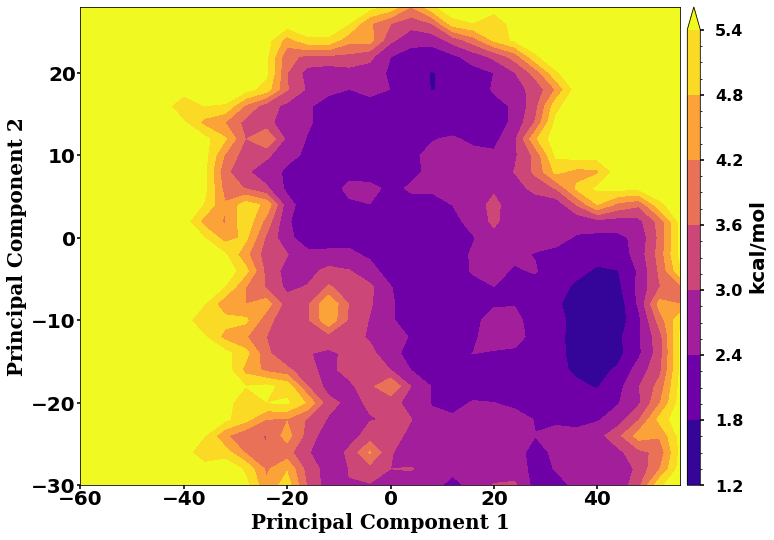

In [27]:
#plot the free energy surface plot 
plt.style.use('seaborn-poster')
plot = plt.contourf(pos[:,:,0],pos[:,:,1],H,extend='max',cmap='plasma')
font1 = {'family': 'serif', 'size': 20, 'color': 'black'}

plt.xlabel("Principal Component 1", fontdict=font1, weight='bold',fontsize=20)
plt.ylabel("Principal Component 2", fontdict=font1, weight='bold',fontsize=20)
plt.tick_params(labelsize=20, pad=1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cbar = plt.colorbar(plot, pad = 0.01, aspect = 35)
cbar.set_label('kcal/mol',rotation=90,labelpad=5, fontsize = 20)
cbar.minorticks_on()


#plt.savefig('WT_0.15M_H2B1_1us.svg', format="svg",transparent=True, dpi = 600)  
#plt.savefig('WT_H2B1_FES.svg',dpi=300,orientation='lanscape', papertype=None, format=None,
          #transparent=False, bbox_inches=None, pad_inches=None,metadata=None)
plt.show()

In [14]:
import pandas as pd
import MDAnalysis as mda

In [15]:
def find_peak(data,c1,c2,min_c1,max_c1,min_c2,max_c2):

    bool_c1_max = data[c1] <= max_c1
    bool_c1_min = data[c1] >= min_c1

    bool_c2_max = data[c2] <= max_c2
    bool_c2_min = data[c2] >= min_c2

    frame = data.loc[bool_c1_min & bool_c1_max & bool_c2_min & bool_c2_max]['F']

    #print(frame)
    frames = frame.values
    #print(frames)
    nf = +len(frames)


    return frames

In [16]:
#use the .csv file that you created for PCA earlier
df = pd.read_csv("WT_0.15M_H2B1_PC.csv")


print("Be careful with negative values for min/max!")
#peak = str(input("Peak name: "))

c1 = "PC1"
min_c1 = 30   #min and max values are based on the basin of interest to find the conformation frame 
max_c1 = 45

c2 = "PC2"
min_c2 = -20  #min and max values are based on the basin of interest to find the conformation frame
max_c2 = -5

frames = find_peak(df,c1,c2,min_c1,max_c1,min_c2,max_c2)

i=1
while len(frames)>5:
    delta_x=1
    frames = find_peak(df,c1,c2,min_c1+delta_x*i,max_c1-delta_x*i,min_c2+delta_x*i,max_c2-delta_x*i)
    print(len(frames))
    i=i+1
    
for i in range(len(frames)):
    print(frames[i])


nf = +len(frames)

print("There are %s to write." % nf) #it will provide the frame number that the conformation belongs to 

print("Using MDAnalysis version", mda.__version__)

Be careful with negative values for min/max!
494
364
238
143
78
28
2
19
504
There are 2 to write.
Using MDAnalysis version 2.4.3


In [12]:
df = pd.read_csv("WT_0.15M_H2B1_PC.csv")


print("Be careful with negative values for min/max!")
#peak = str(input("Peak name: "))
c1 = "PC1"
min_c1 = 0
max_c1 = 10

c2 = "PC2"
min_c2 = 15
max_c2 = 25

frames = find_peak(df,c1,c2,min_c1,max_c1,min_c2,max_c2)

i=1
while len(frames)>5:
    delta_x=1
    frames = find_peak(df,c1,c2,min_c1+delta_x*i,max_c1-delta_x*i,min_c2+delta_x*i,max_c2-delta_x*i)
    print(len(frames))
    i=i+1
    
for i in range(len(frames)):
    print(frames[i])


nf = +len(frames)

print("There are %s to write." % nf)

print("Using MDAnalysis version", mda.__version__)

Be careful with negative values for min/max!
112
61
26
4
1634
2306
2332
2346
There are 4 to write.
Using MDAnalysis version 2.4.3
